In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

In [21]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [22]:
# set up lists to hold reponse info
country = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
found_cities = []
date = []

counter = 0
# Loop through the list of cities and perform a request for data on each
for city in cities:
    counter+=1
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        found_cities.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print(city + f' not found {counter}')
    else:
        print(response['name'] + f' {counter}')
        
        
## HOW TO NUMBER CITIES output?
## HOW TO OUTPUT JPG? 

Bandarbeyla 1
Qaanaaq 2
Zyryanka 3
Arman' 4
Rikitea 5
Berdigestyakh 6
Oddur 7
Jamestown 8
illoqqortoormiut not found 9
Albany 10
Samaná 11
Atherton 12
Hatillo 13
Palmas Bellas 14
New Norfolk 15
Hornepayne 16
At-Bashi 17
Beloha 18
Busselton 19
Sirte 20
Yerbogachën 21
amderma not found 22
tsihombe not found 23
Manta 24
Savonlinna 25
Nome 26
Carnarvon 27
Bethel 28
Kapaa 29
Gijang 30
Port Shepstone 31
Port Macquarie 32
Morondava 33
Kumul 34
Atuona 35
Koróni 36
Butaritari 37
Hilo 38
Yining 39
nizhneyansk not found 40
Alta Floresta 41
Yangjiang 42
Isangel 43
Saint-Philippe 44
Yellowknife 45
Sambava 46
Adrar 47
Bluff 48
Port Alfred 49
Cape Town 50
Faya 51
Coquimbo 52
Synya 53
Gonder 54
Mount Gambier 55
Bisert' 56
Tselinnoye 57
karaul not found 58
Kaka 59
Bredasdorp 60
barentsburg not found 61
Hesla 62
Paphos 63
La Libertad 64
Katobu 65
Pisco 66
vaitupu not found 67
Ushuaia 68
Henties Bay 69
Morón 70
Flinders 71
mrirt not found 72
sentyabrskiy not found 73
Turinskaya Sloboda 74
Thompson 75
Has

Tinos 585
Gubskaya 586
Miguel Hidalgo 587
Dalbandin 588
Pathānkot 589
Xai-Xai 590
El Colomo 591
Halifax 592
Paracelis 593
Lafia 594
Vila Velha 595
San Policarpo 596
Cuamba 597
Eyl 598
Gijón 599
Vila 600
Wichita Falls 601
Kuril'sk 602
Leshukonskoye 603
Beringovskiy 604
Marsá Maţrūḩ 605
Casablanca 606
Kholodnyy 607
Asău 608
Mujiayingzi 609
Bakchar 610
Talnakh 611
Boguchany 612
Togur 613
Omsukchan 614
Arlit 615
Angoche 616
Sayyan 617
Baicheng 618
Villarrica 619
Salalah 620
Kota Kinabalu 621
Bol 622
Kailua 623
Qui Nhon 624


In [23]:
mylist = ['anthony', 'phil', 'paul', 'pincus']

blah = (0, 'anthony')

blah1, blah2 = 0, 'anthony'

for counter,name in enumerate(mylist):
    print(counter,name)

0 anthony
1 phil
2 paul
3 pincus


In [24]:
weather_dic = {
    'city' : found_cities,
    'country': country,
    'latitude' : lat,
    'longitude' : lon,
    'temperature' : temp,
    'humidity' : humid,
    'cloudy' : cloud,
    'wind speed' : wind,
    'date' : date
     }

weather_data2 = pd.DataFrame(weather_dic)
weather_data = weather_data2.loc[weather_data2['humidity']< 101]

In [25]:
weather_data

,city,country,latitude,longitude,temperature,humidity,cloudy,wind speed,date
0,Bandarbeyla,SO,9.49,50.81,79.66,69,0,20.60,1595896684
1,Qaanaaq,GL,77.48,-69.36,44.20,61,0,2.86,1595896640
2,Zyryanka,RU,65.75,150.85,71.28,55,2,10.31,1595896685
3,Arman',RU,59.70,150.17,63.75,71,100,5.21,1595896326
4,Rikitea,PF,-23.12,-134.97,72.09,81,77,13.24,1595896509
...,...,...,...,...,...,...,...,...,...
574,Salalah,OM,17.02,54.09,78.80,100,75,5.82,1595896841
575,Kota Kinabalu,MY,5.97,116.07,80.20,83,20,4.70,1595896841
576,Bol,TD,13.46,14.71,82.71,68,44,8.90,1595896842
577,Kailua,US,21.40,-157.74,83.70,55,20,12.75,1595896842


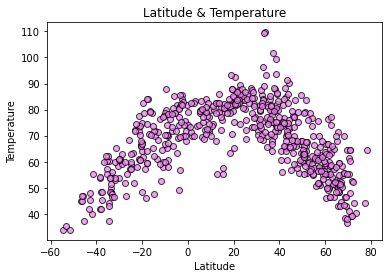

In [60]:
#latitude vs temperature
plt.scatter(weather_data['latitude'],weather_data['temperature'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig('../output_data/lat_temp.png')

**You can see the relation to where a city is located on earth and it's current temperature. The curve clearly represents the curviture of the earth and zero latitude being the equator**

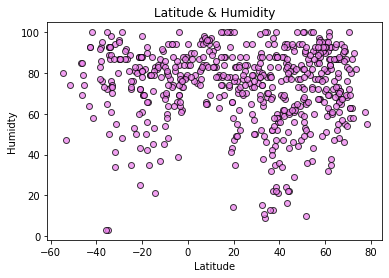

In [61]:
#latitude vs humidty
plt.scatter(weather_data['latitude'], weather_data['humidity'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidty")

plt.savefig('../output_data/lat_hum.png')

**No clear trend comparing humidity and latitude of a city**

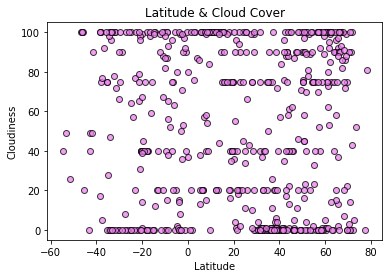

In [62]:
#latitude vs cloudiness
plt.scatter(weather_data['latitude'], weather_data['cloudy'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig('../output_data/lat_cloud.png')

**Cloud cover seems pretty random for latitudes**

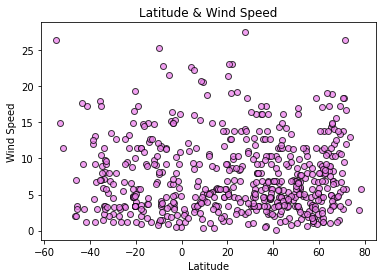

In [63]:
#latitude vs wind speed
plt.scatter(weather_data['latitude'],weather_data ['wind speed'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig('../output_data/lat_wind.png')

**Wind speed is also showing no clear trend with regards to latitude**

In [30]:
northern = weather_data.loc[weather_data['latitude'] > 0]

In [31]:
southern = weather_data.loc[weather_data['latitude'] <= 0]

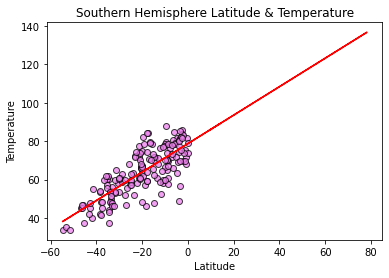

In [64]:
# southern latitude vs temperature
plt.scatter(southern['latitude'], southern['temperature'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Southern Hemisphere Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['latitude'], southern['temperature'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")


plt.savefig('../output_data/south_lat_temp.png')

**There is a obvious trend showin the relationship between latitude and temperature. As the the latitude has a negative increase (further from the equator), the temperature decreases.**

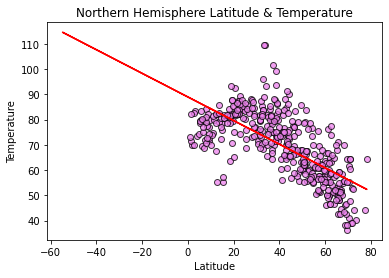

In [65]:
# northern latitude vs temperature
plt.scatter(northern['latitude'],northern['temperature'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['latitude'], northern['temperature'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/north_lat_temp.png')

**The temperature decreases as latitude increases (gets further from the equator).**

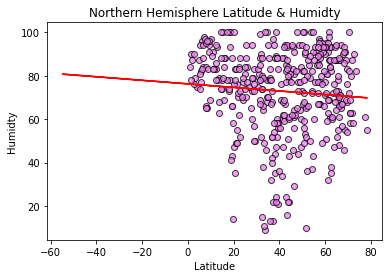

In [66]:
# northern latitude vs humidity
plt.scatter(northern['latitude'],northern['humidity'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Humidty")
plt.xlabel("Latitude")
plt.ylabel("Humidty")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['latitude'], northern['humidity'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/north_lat_hum.png')

**Doesn't appear to be correlation**

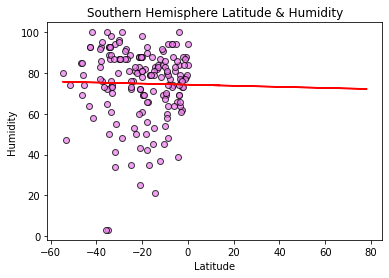

In [67]:
# southern latitude vs humidity
plt.scatter(southern['latitude'],southern['humidity'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Southern Hemisphere Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['latitude'], southern['humidity'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/south_lat_hum.png')

**Little trend in relationship between latitude and humidity**

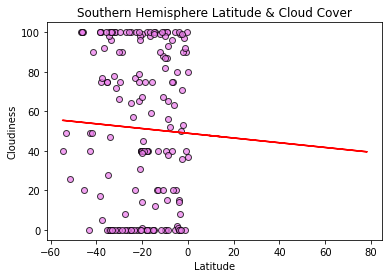

In [68]:
# southern latitude vs cloudiness
plt.scatter(southern['latitude'],southern['cloudy'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Southern Hemisphere Latitude & Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['latitude'], southern['cloudy'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/south_lat_cloud.png')

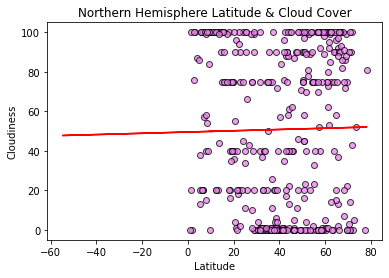

In [69]:
# northern latitude vs cloudiness
plt.scatter(northern['latitude'],northern['cloudy'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['latitude'], northern['cloudy'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/north_lat_cloud.png')

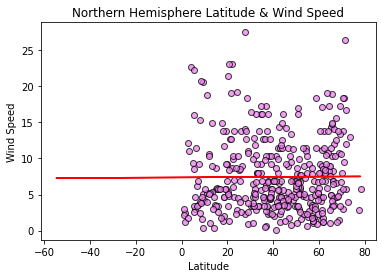

In [70]:
# northern latitude vs wind
plt.scatter(northern['latitude'],northern['wind speed'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)

plt.title("Northern Hemisphere Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['latitude'], northern['wind speed'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/north_lat_wind.png')

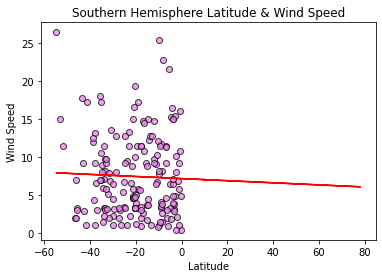

In [71]:
# southern latitude vs wind
plt.scatter(southern['latitude'],southern['wind speed'], marker="o", facecolors="violet", edgecolors="black",
            alpha=0.75)
plt.title("Southern Hemisphere Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['latitude'], southern['wind speed'])
regress_values = weather_data['latitude'] * slope + intercept





# Plot regression line
plt.plot(weather_data['latitude'],regress_values,"r-")

plt.savefig('../output_data/south_lat_wind.png')

In [72]:
weather_data.to_csv(r'../output_data/cities.csv')